## **CNN with MNIST Data**

In [1]:
import pandas as pd
import seaborn as sns
import tensorflow as tf                       
import numpy as np                           
import matplotlib.pyplot as plt               
%matplotlib inline

In [2]:
print(tf.__version__)

2.8.0


In [3]:
print("Num GPUs Available: ", len(tf.config.list_physical_devices('GPU')))

Num GPUs Available:  0


In [4]:
tf.config.list_physical_devices('GPU')

[]

In [5]:
# Release GPU memory to prevent memory-leaks.

from numba import cuda
device = cuda.get_current_device()
device.reset()

ModuleNotFoundError: No module named 'numba'

In [6]:
!nvidia-smi

'nvidia-smi' is not recognized as an internal or external command,
operable program or batch file.


In [7]:
from tensorflow.keras.datasets.mnist import load_data    # To load the MNIST digit dataset

(X_train, y_train) , (X_test, y_test) = load_data()      # Loading data

11501568/11490434 [==============================] - 1s 0us/step


In [8]:
print("There are ", len(X_train), "images in the training dataset")     
print("There are ", len(X_test), "images in the test dataset")   

There are  60000 images in the training dataset
There are  10000 images in the test dataset


In [9]:
# Checking the shape of one image
X_train[8].shape

(28, 28)

In [10]:
X_train[8]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   5,
         63, 197,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  

In [11]:
X_train[8].shape

(28, 28)

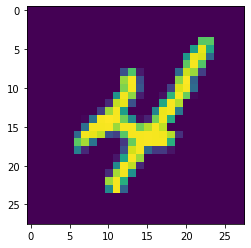

In [12]:
plt.imshow(X_train[9])
# plt.matshow(X_train[5])

In [13]:
y_train

array([5, 0, 4, ..., 5, 6, 8], dtype=uint8)

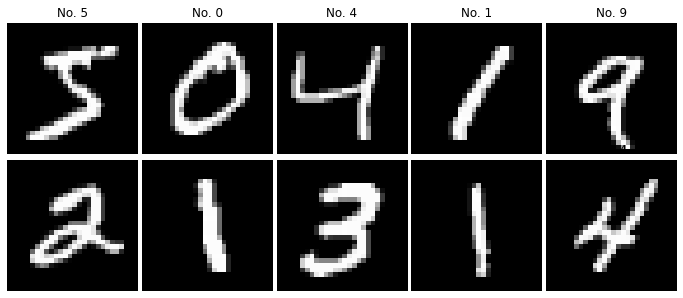

In [14]:
num_rows, num_cols = 2, 5
f, ax = plt.subplots(2, 5, figsize=(12,5),
                     gridspec_kw={'wspace':0.03, 'hspace':0.02}, 
                     squeeze=True)

for r in range(num_rows):
    for c in range(num_cols):
      
        image_index = r * 5 + c
        ax[r,c].axis("off")
        ax[r,c].imshow( X_train[image_index], cmap='gray')
        ax[r,c].set_title('No. %d' % y_train[image_index])
plt.show()
plt.close()

## Data Preprocessing

In [15]:
X_train[9].min()

0

In [16]:
X_train[9].max()

255

In [17]:
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train /= 255
X_test /= 255

In [18]:
X_train[9].min()

0.0

In [19]:
X_train[9].max()

1.0

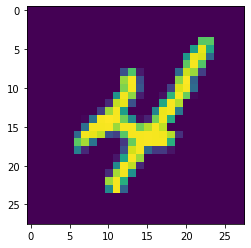

In [20]:
plt.imshow(X_train[9])

In [21]:
X_train = X_train.reshape(X_train.shape[0],28, 28, 1) 
X_test = X_test.reshape(X_test.shape[0], 28, 28, 1)

In [22]:
X_train.shape, X_test.shape

((60000, 28, 28, 1), (10000, 28, 28, 1))

In [23]:
y_train

array([5, 0, 4, ..., 5, 6, 8], dtype=uint8)

In [24]:
from tensorflow.keras.utils import to_categorical

In [25]:
Y_train = to_categorical(y_train, 10) 
Y_test = to_categorical(y_test, 10)
Y_test.shape

(10000, 10)

In [26]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, MaxPool2D, Flatten

In [27]:
model = Sequential()

model.add(Conv2D(filters=32, kernel_size=(3,3),input_shape=(28, 28, 1), activation='relu'))

model.add(MaxPool2D(pool_size=(2, 2)))

model.add(Flatten())

model.add(Dense(128, activation='relu'))

model.add(Dense(10, activation='softmax'))

model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

**A sample example showing the conversion of 3D data to 2D**
![3Dto2D](https://dphi-courses.s3.ap-south-1.amazonaws.com/Deep+Learning+Bootcamp/3D+to++2D.png)

In [28]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 13, 13, 32)       0         
 )                                                               
                                                                 
 flatten (Flatten)           (None, 5408)              0         
                                                                 
 dense (Dense)               (None, 128)               692352    
                                                                 
 dense_1 (Dense)             (None, 10)                1290      
                                                                 
Total params: 693,962
Trainable params: 693,962
Non-trainable params: 0
__________________________________________________

In [29]:
from tensorflow.keras.callbacks import EarlyStopping

In [30]:
early_stop = EarlyStopping(monitor='val_loss',patience=2)

In [31]:
model.fit(X_train, Y_train, batch_size=32, epochs=10, validation_data=(X_test,Y_test),callbacks=[early_stop])


Epoch 1/10
1875/1875 [==============================] - 42s 21ms/step - loss: 0.1482 - accuracy: 0.9554 - val_loss: 0.0564 - val_accuracy: 0.9822
Epoch 2/10
1875/1875 [==============================] - 35s 19ms/step - loss: 0.0504 - accuracy: 0.9846 - val_loss: 0.0513 - val_accuracy: 0.9836
Epoch 3/10
1875/1875 [==============================] - 35s 19ms/step - loss: 0.0326 - accuracy: 0.9898 - val_loss: 0.0528 - val_accuracy: 0.9825
Epoch 4/10
1875/1875 [==============================] - 35s 19ms/step - loss: 0.0217 - accuracy: 0.9933 - val_loss: 0.0480 - val_accuracy: 0.9842
Epoch 5/10
1875/1875 [==============================] - 35s 19ms/step - loss: 0.0140 - accuracy: 0.9959 - val_loss: 0.0501 - val_accuracy: 0.9837
Epoch 6/10
1875/1875 [==============================] - 34s 18ms/step - loss: 0.0109 - accuracy: 0.9965 - val_loss: 0.0422 - val_accuracy: 0.9868
Epoch 7/10
1875/1875 [==============================] - 35s 19ms/step - loss: 0.0085 - accuracy: 0.9970 - val_loss: 0.0561 -

In [32]:
model.metrics_names

['loss', 'accuracy']

In [33]:
model.history.history

{'loss': [0.1482386291027069,
  0.05037575587630272,
  0.03263004496693611,
  0.021694079041481018,
  0.014013026840984821,
  0.010860794223845005,
  0.008499065414071083,
  0.005202430300414562],
 'accuracy': [0.9554333090782166,
  0.9846000075340271,
  0.9897500276565552,
  0.9932833313941956,
  0.9958999752998352,
  0.9964500069618225,
  0.9969666600227356,
  0.9983166456222534],
 'val_loss': [0.056354328989982605,
  0.0512559749186039,
  0.052783552557229996,
  0.048039671033620834,
  0.05010171979665756,
  0.04224593564867973,
  0.056051481515169144,
  0.06287446618080139],
 'val_accuracy': [0.982200026512146,
  0.9836000204086304,
  0.9825000166893005,
  0.9842000007629395,
  0.9836999773979187,
  0.9868000149726868,
  0.9842000007629395,
  0.9857000112533569]}

In [34]:
summary = pd.DataFrame(model.history.history)
summary.head()

,loss,accuracy,val_loss,val_accuracy
0,0.148239,0.955433,0.056354,0.9822
1,0.050376,0.984600,0.051256,0.9836
2,0.032630,0.989750,0.052784,0.9825
3,0.021694,0.993283,0.048040,0.9842
4,0.014013,0.995900,0.050102,0.9837


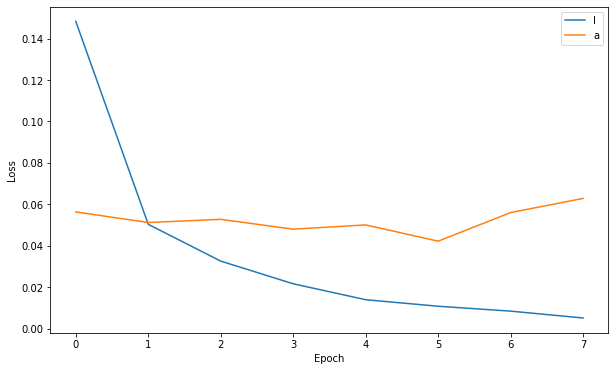

In [35]:
plt.figure(figsize=(10,6))
plt.plot(summary.loss)
plt.plot(summary.val_loss)
plt.ylabel("Loss")
plt.xlabel("Epoch")
plt.legend('labels')

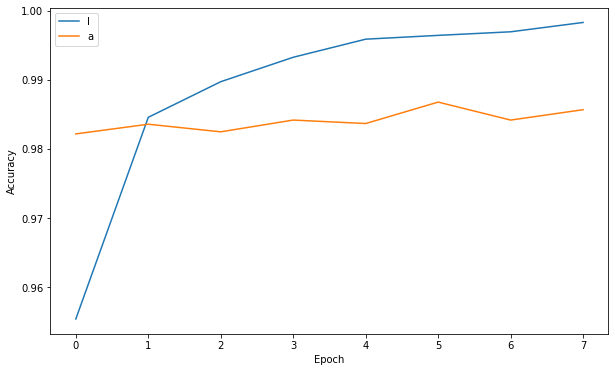

In [36]:
plt.figure(figsize=(10,6))
plt.plot(summary.accuracy)
plt.plot(summary.val_accuracy)
plt.ylabel("Accuracy")
plt.xlabel("Epoch")
plt.legend('labels');

In [37]:
print(model.evaluate(X_test,Y_test,verbose=1))

313/313 [==============================] - 2s 6ms/step - loss: 0.0629 - accuracy: 0.9857
[0.06287446618080139, 0.9857000112533569]


In [38]:
from sklearn.metrics import classification_report,confusion_matrix

In [39]:
preds = model.predict(X_test)
preds

array([[2.1689558e-12, 1.9426058e-11, 2.8815153e-13, ..., 1.0000000e+00,
        4.3692268e-12, 1.7181959e-08],
       [4.6981620e-11, 3.1654511e-06, 9.9999678e-01, ..., 6.1004414e-16,
        1.6964812e-10, 2.9178562e-11],
       [1.7538049e-11, 9.9999905e-01, 5.9149220e-11, ..., 3.2672318e-07,
        5.0813367e-09, 1.2918287e-11],
       ...,
       [6.3333770e-21, 8.0016324e-18, 7.1101742e-19, ..., 7.6135513e-12,
        2.0195329e-10, 5.3767227e-08],
       [8.4267159e-12, 4.0775563e-14, 1.0587194e-17, ..., 4.4324760e-13,
        9.8113324e-03, 1.9439009e-11],
       [7.4180972e-13, 7.5136132e-14, 1.4441155e-14, ..., 1.9696622e-19,
        4.3753921e-11, 1.3039778e-14]], dtype=float32)

In [40]:
preds[0]

array([2.1689558e-12, 1.9426058e-11, 2.8815153e-13, 1.2368238e-09,
       1.3951763e-12, 2.3896506e-15, 2.3976536e-19, 1.0000000e+00,
       4.3692268e-12, 1.7181959e-08], dtype=float32)

In [41]:
predictions= np.argmax(preds, axis=1)

In [42]:
len(predictions)

10000

In [43]:
predictions

array([7, 2, 1, ..., 4, 5, 6], dtype=int64)

In [44]:
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       0.99      0.99      0.99       980
           1       0.99      1.00      0.99      1135
           2       0.99      0.97      0.98      1032
           3       0.98      1.00      0.99      1010
           4       0.99      0.99      0.99       982
           5       1.00      0.97      0.99       892
           6       0.99      0.99      0.99       958
           7       0.99      0.98      0.98      1028
           8       0.98      0.98      0.98       974
           9       0.97      0.99      0.98      1009

    accuracy                           0.99     10000
   macro avg       0.99      0.99      0.99     10000
weighted avg       0.99      0.99      0.99     10000



In [45]:
print(confusion_matrix(y_test, predictions))

[[ 975    1    0    1    0    0    2    0    1    0]
 [   0 1130    0    1    1    0    1    1    1    0]
 [   2    3 1002    1    1    0    3    7   13    0]
 [   0    0    0 1005    0    1    0    0    3    1]
 [   0    0    0    0  972    0    3    0    0    7]
 [   2    1    1   13    0  868    4    0    1    2]
 [   4    3    0    0    2    1  946    0    2    0]
 [   0    2    5    0    1    0    0 1009    1   10]
 [   2    0    1    1    2    0    0    3  956    9]
 [   2    1    0    3    4    0    0    3    2  994]]


In [46]:
score = model.evaluate(X_test, Y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Test loss: 0.06287446618080139
Test accuracy: 0.9857000112533569


In [47]:
my_number = X_test[5]

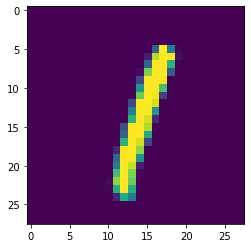

In [48]:
plt.imshow(my_number.reshape(28,28));

In [49]:
model.predict(my_number.reshape(1,28,28,1))

array([[1.5998512e-10, 9.9998879e-01, 3.7650558e-10, 1.5121025e-13,
        2.7187551e-07, 4.4826590e-10, 4.4472442e-12, 1.0903699e-05,
        1.1128481e-07, 8.9367430e-10]], dtype=float32)

In [50]:
# SHAPE --> (num_images,width,height,color_channels)
np.argmax(model.predict(my_number.reshape(1,28,28,1)), axis=1)

array([1], dtype=int64)

In [ ]:
model.save("cnn-1.h5")